(a) Muestre con detalle que: $I_0 = \frac{1}{4}mr^2 + md^2$

Para demostrar el momento de inercia del trompo planteado en el problema se hará uso del teorema de ejes perpendiculares para encontrar el momento de inercia del disco alrededor de la dirección azimultal y, luego, ejes paralelos para encontrar el del trompo completo.

Tenemos que el momento de inercia del disco en el eje z es $I_0=\frac{1}{2}mr^2$ (se verifica en el inciso b). Por ejes el teorema de ejes perpendiculares el momento de inercia de un eje perpendicular al plano, en este caso el eje $z$, equivale a la suma de los momentos de inercia de los otros dos ejes paralelos al plano, es decir, $I_z = I_x + I_y$. Por la simetria del problema, la rotación sobre el eje $x$ debe ser igual a la del eje $y$, por lo que entonces el momento de inercia en dirección azimutal sería:
$$I_x = I_y = \frac{1}{4}mr^2$$
de tal forma que se satisfaga la expresión ya discutida. Asimismo, para encontrar el momento de inercia del trompo completo, hagamos uso del teorema de ejes paralelos, el cual dice que el momento de inercia sería la suma del momento de inercia total sumando la distancia al centro de masa al cuadrado por la masa del objeto, es decir:
$$I_0 = \frac{1}{4}mr^2 + md^2.$$

(b) Calcule el momento de inercia del disco: $I_z =\frac{1}{2}mr^2$.

Tenemos que

$$I_z = \int r^2dm$$
donde $dm=\sigma dA = \sigma r dr d\theta$. Dada la simetria del problema $\sigma = m/\pi r^2$ y la integración va desde el centro del disco hasta el extremo ($0$ a $r$) y debe recorrer toda la circunferencia ($0$ a $2\pi$). Entonces,
$$\sigma \int_0^{2\pi} \int_0^r r^3 dr d\theta = \frac{\sigma}{4} \int_0^{2\pi} r^4 d\theta = \frac{2\pi\sigma}{4} r^4 = \frac{1}{2} m r^4 $$

(c) Usando las ecuaciones de Euler-Lagrange muestre que las ecuaciones de movimiento.

Teniendo en cuenta que el lagrangiano

$$ L = \frac{1}{2}I_0(\dot{\theta}^2 + \dot{\phi}^2 \sin^2\theta) + \frac{1}{2}I_z(\dot{\phi}\cos\theta + \dot{\psi})^2 - mgd\cos\theta $$

encontremos las ecuaciones de movimiento derivando respecto a $\dot{\phi}$ y $\dot{\psi}$

$$\frac{\partial L}{\partial\dot{\phi}} = I_0\dot{\phi}\sin^2\theta + \frac{1}{2}I_z\dot{\phi}\cos\theta + I_z\dot{\psi}\cos\theta = p_{\phi}$$

$$\frac{\partial L}{\partial\dot{\psi}} = I_z\dot{\phi}\cos\theta + I_z\dot{\psi}= p_{\psi}$$

Como
$$\frac{dL}{d\theta}-\frac{d}{dt}\left(\frac{dL}{d\dot{\theta}} \right) = 0$$

$$\frac{dL}{d\theta} = I_0 \dot{\phi}^2\sin\theta \cos\theta\ \ddot{\theta}+ I_z(\dot{\phi}\cos\theta+\dot{\psi})(-\dot{\phi}\sin\theta\ \dot{\theta}) + mgd\sin{\theta}\\
I_0\ddot{\theta}=I_0\phi^2\sin\theta\cos\theta\dot{}$$

(c) Usando las ecuaciones de Euler-Lagrange muestre que las ecuaciones de movimiento.

Teniendo en cuenta que el lagrangiano

$$ L = \frac{1}{2}I_0(\dot{\theta}^2 + \dot{\phi}^2 \sin^2\theta) + \frac{1}{2}I_z(\dot{\phi}\cos\theta + \dot{\psi})^2 - mgd\cos\theta $$

encontremos las ecuaciones de movimiento derivando respecto a $\dot{\phi}$ y $\dot{\psi}$

$$\frac{\partial L}{\partial\dot{\phi}} = I_0\dot{\phi}\sin^2\theta + \frac{1}{2}I_z\dot{\phi}\cos\theta + I_z\dot{\psi}\cos\theta = p_{\phi}$$

$$\frac{\partial L}{\partial\dot{\psi}} = I_z\dot{\phi}\cos\theta + I_z\dot{\psi}= p_{\psi}$$

Como
$$\frac{dL}{d\theta}=\frac{d}{dt}\left(\frac{dL}{d\dot{\theta}} \right)$$

$$\frac{dL}{d\theta} = I_0 \dot{\phi}^2\sin\theta \cos\theta\ \dot{\theta}+ I_z(\dot{\phi}\cos\theta+\dot{\psi})(-\dot{\phi}\sin\theta\ \dot{\theta}) + mgd\sin{\theta}\\
=I_0\dot{\phi}^2\sin\theta\ \cos\theta\ \dot{\theta} - I_z\dot{\phi}^2\sin\theta\cos\theta\dot{\theta} - I_z\dot{\phi}\sin\theta\dot{\theta}+mgd\sin{\theta}\\
= \dot{\phi}^2\sin\theta\ \cos\theta\ (I_0-I_z)- I_z\dot{\phi}\dot{\psi}\sin\theta+mgd\sin{\theta}$$
Asimismo,
$$\frac{d}{dt}\left(\frac{dL}{d\dot{\theta}} \right) = \frac{d}{dt} I_0\dot{\theta} = I_0\ddot{\theta}$$
$$ I_0\ddot{\theta}= \dot{\phi}^2\sin\theta\ \cos\theta\ (I_0-I_z)- I_z\dot{\phi}\dot{\psi}\sin\theta+mgd\sin{\theta}$$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
#y = [phi, psi, theta, thetaD]
y0 = [0,0,np.pi*0.25,0]
t=np.linspace(0,8,1000)

m = 0.1
r = 0.1
d = 0.3
g = 9.81
psiD = 400


In [3]:
def System(coord, t):
    
    phi = coord[0]
    psi = coord[1]
    theta = coord[2]
    thetaD = coord[3]
    
    I_0 = 0.25*m*r**2 +m*d**2
    I_z = 0.5*m*r**2
    
    dphi= (I_z*psiD*np.cos(y0[2])-I_z*psiD*np.cos(theta))/(I_0*np.sin(theta)**2 + I_z*np.cos(theta)**2)
    dpsiD = psiD
    dtheta = thetaD
    dtheta2 = (1/I_0)*(dphi**2 * np.sin(theta)*np.cos(theta)*(I_0-I_z)-psiD*dphi*I_z*np.sin(theta)+m*g*d*np.sin(theta))
    return dphi, dpsiD, dtheta, dtheta2

In [4]:
Sol = integrate.odeint(System,y0,t)

In [5]:
phi = Sol[:,0]
psi = Sol[:,1]
theta = Sol[:,2]
theta2 = Sol[:,3]

In [6]:
x = d*np.sin(theta)*np.sin(phi)
y = d*np.sin(theta)*np.cos(phi)
z = d*np.cos(theta)

<IPython.core.display.Javascript object>


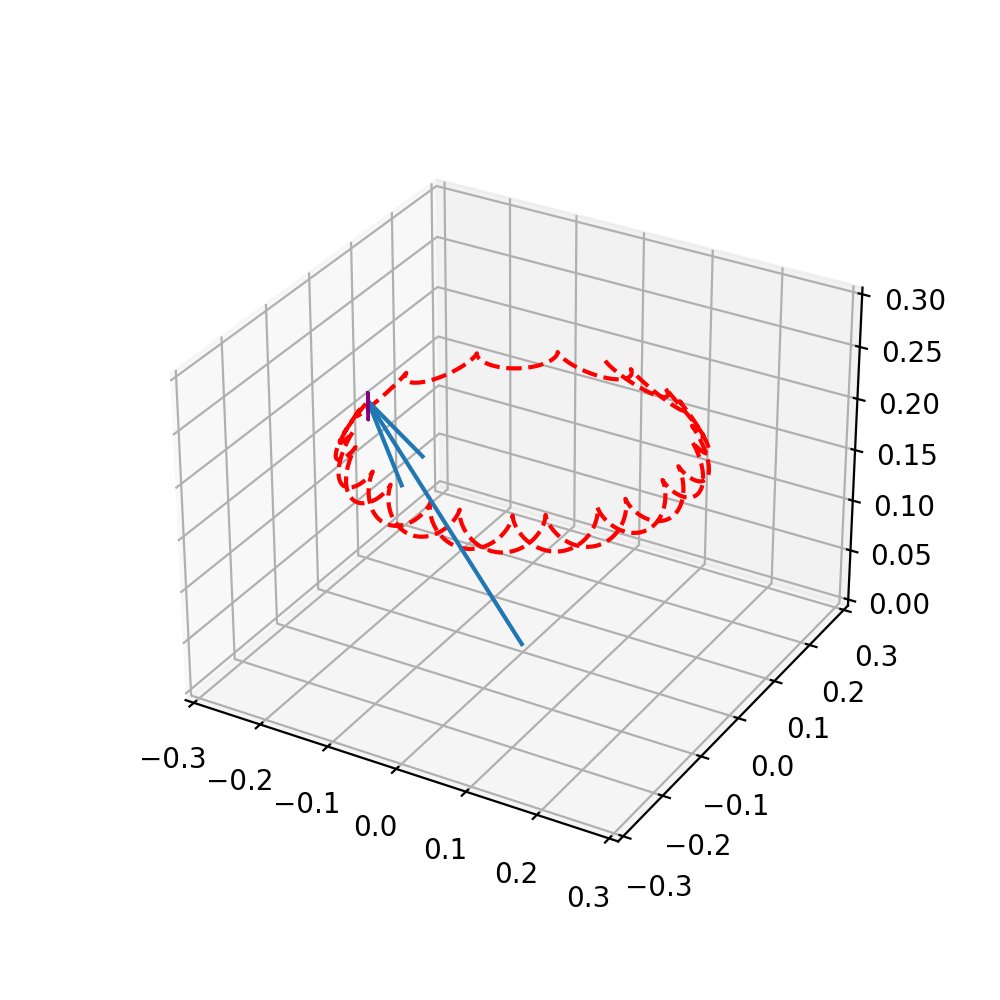

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#ax.plot(x,y,z)

#T = t[::scale]
T=t
scale=5
def init():
    
    ax.clear()
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_zlim(0,0.3)

def Update(i):
    init()
    ax.quiver(0,0,0,x[i*5],y[i*5],z[i*5])
    #ax.plot(x[::scale][i], y[::scale][i], z[::scale][i], color='r')   
    ax.plot(x[:5*i],y[:5*i],z[:5*i],"--", color='r')
    ax.scatter(x[::scale][i],y[::scale][i],z[::scale],marker=".", color='purple', s=0.1)
    #ax.scatter(0,0,color="g")
    
        
Animation1 = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)

In [9]:
#Animation1.save('Spinning top.gif', writer='pillow')

In [10]:
Deltas = 0
for i in range(1, len(t)):
    Deltas += (phi[i]-phi[i-1])/(t[i]-t[i-1]) 
VP = Deltas/len(t)

In [11]:
f"El valor de la velocidad de precesión promedio es: {VP}"

'El valor de la velocidad de precesión promedio es: 1.5369711151556984'